# 라이브러리 불러오기

In [2]:
from data.load_dataset import load_dataset
from data.merge_dataset import merge_dataset
import pandas as pd
import numpy as np
from sklearn.neighbors import BallTree
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기

In [3]:
# 기존 데이터 불러오기
train_data, test_data, sample_submission, interest_data, subway_data, school_data, park_data = load_dataset()

# 기존 데이터에 새로운 feature들을 병합한 데이터프레임 불러오기
train_data, test_data = merge_dataset(train_data, test_data, interest_data, subway_data, school_data, park_data)

In [4]:
train_data

,index,area_m2,contract_year_month,contract_day,contract_type,floor,built_year,latitude,longitude,age,...,nearest_subway_longitude,nearest_school_distance,nearest_school_latitude,nearest_school_longitude,nearest_park_distance,nearest_park_latitude,nearest_park_longitude,nearest_subway_num,nearest_school_num,nearest_park_num
0,0,84.9981,201906,25,2,9,2019,37.054314,127.045216,0,...,127.052819,156.120431,37.053232,127.046337,498.618918,37.051333,127.041019,1,1,1
1,1,84.9981,202003,26,2,20,2019,37.054314,127.045216,1,...,127.052819,156.120431,37.053232,127.046337,498.618918,37.051333,127.041019,1,1,1
2,2,84.9981,202003,28,2,8,2019,37.054314,127.045216,1,...,127.052819,156.120431,37.053232,127.046337,498.618918,37.051333,127.041019,1,1,1
3,3,59.3400,201907,15,2,1,1986,36.964647,127.055847,33,...,127.085159,214.559689,36.962943,127.056980,169.839678,36.963502,127.054582,1,1,1
4,4,59.8100,201904,12,2,6,1995,36.972390,127.084514,24,...,127.085159,1708.489263,36.987746,127.085154,382.401815,36.971743,127.088742,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801223,1801223,114.8126,202311,25,0,5,2010,37.528394,126.659398,13,...,126.675539,224.754177,37.529291,126.657114,398.113485,37.528189,126.654891,1,1,1
1801224,1801224,101.9088,202311,28,0,6,2010,37.528394,126.659398,13,...,126.675539,224.754177,37.529291,126.657114,398.113485,37.528189,126.654891,1,1,1
1801225,1801225,114.7900,202312,3,0,19,2010,37.528394,126.659398,13,...,126.675539,224.754177,37.529291,126.657114,398.113485,37.528189,126.654891,1,1,1
1801226,1801226,101.9088,202312,4,1,15,2010,37.528394,126.659398,13,...,126.675539,224.754177,37.529291,126.657114,398.113485,37.528189,126.654891,1,1,1


In [5]:
test_data

,index,area_m2,contract_year_month,contract_day,contract_type,floor,built_year,latitude,longitude,age,...,nearest_subway_longitude,nearest_school_distance,nearest_school_latitude,nearest_school_longitude,nearest_park_distance,nearest_park_latitude,nearest_park_longitude,nearest_subway_num,nearest_school_num,nearest_park_num
0,0,84.9610,202404,12,1,14,2016,36.965423,127.048779,8,...,127.085159,779.057020,36.962943,127.056980,288.442840,36.964653,127.045679,1,1,1
1,1,59.9000,202404,13,0,4,1997,36.963105,127.040678,27,...,127.085159,1448.494091,36.962943,127.056980,153.733042,36.961730,127.040502,1,1,1
2,2,39.2700,202404,29,0,5,1990,36.957089,127.047449,34,...,127.085159,808.416163,36.950687,127.051762,272.286038,36.959505,127.047945,1,1,1
3,3,39.2700,202405,3,0,1,1990,36.957089,127.047449,34,...,127.085159,808.416163,36.950687,127.051762,272.286038,36.959505,127.047945,1,1,1
4,4,46.9800,202406,2,0,4,1990,36.957089,127.047449,34,...,127.085159,808.416163,36.950687,127.051762,272.286038,36.959505,127.047945,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150167,150167,115.5101,202402,27,0,17,2010,37.528394,126.659398,14,...,126.675539,224.754177,37.529291,126.657114,398.113485,37.528189,126.654891,1,1,1
150168,150168,142.8738,202403,2,0,4,2010,37.528394,126.659398,14,...,126.675539,224.754177,37.529291,126.657114,398.113485,37.528189,126.654891,1,1,1
150169,150169,142.8738,202403,16,1,13,2010,37.528394,126.659398,14,...,126.675539,224.754177,37.529291,126.657114,398.113485,37.528189,126.654891,1,1,1
150170,150170,114.9285,202403,22,1,2,2010,37.528394,126.659398,14,...,126.675539,224.754177,37.529291,126.657114,398.113485,37.528189,126.654891,1,1,1


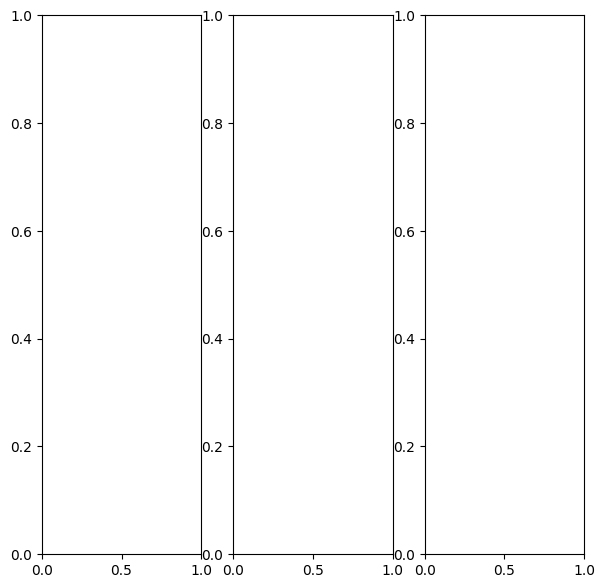

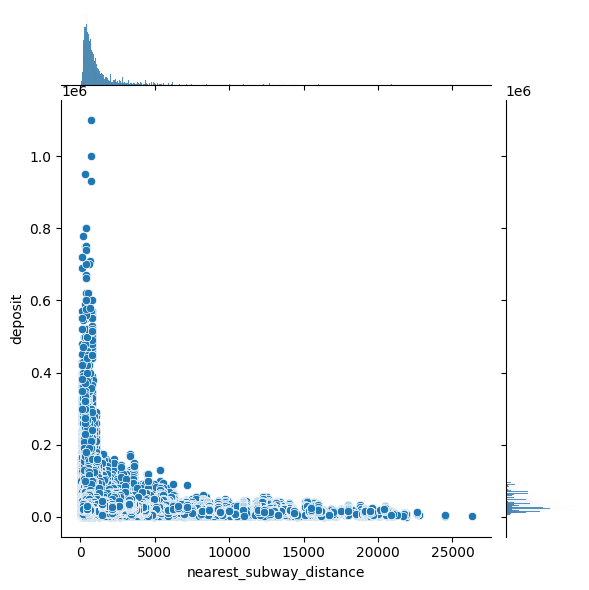

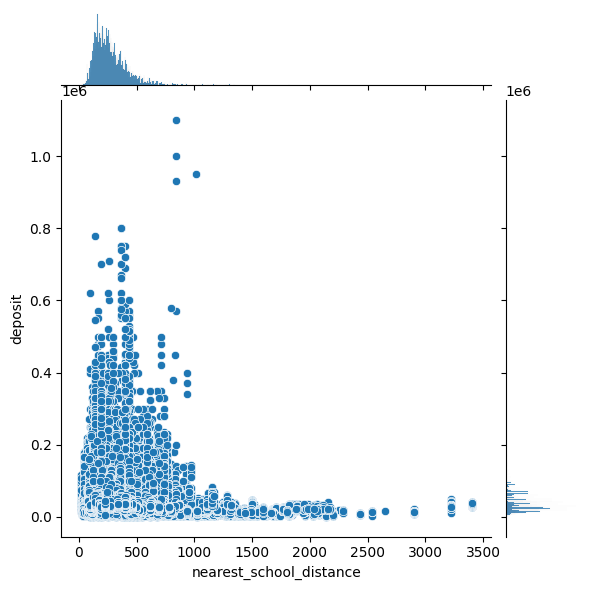

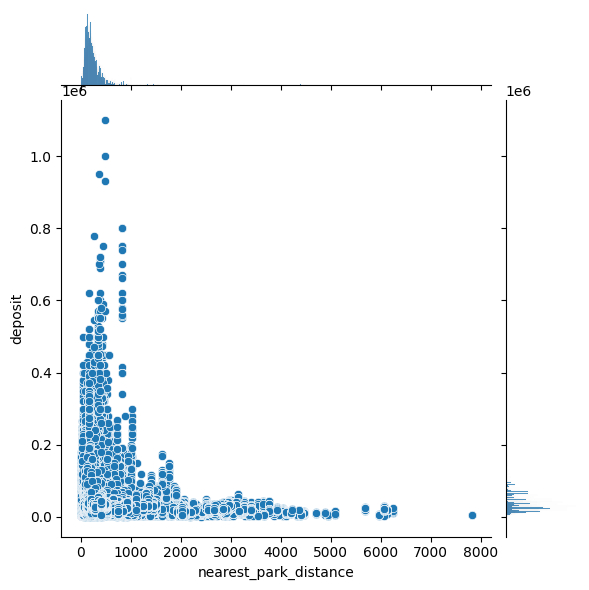

In [12]:
sns.jointplot(data=train_data, x="nearest_subway_distance", y="deposit")
sns.jointplot(data=train_data, x="nearest_school_distance", y="deposit")
sns.jointplot(data=train_data, x="nearest_park_distance", y="deposit")
plt.show()

In [7]:
def find_places_within_radius(
		data: pd.DataFrame,
		loc_data: pd.DataFrame,
		radius_meter: int
) -> pd.DataFrame:
    # degree -> radian 값으로 변환 for 삼각함수
    data_coords = np.radians(data[["latitude", "longitude"]].values)
    loc_coords = np.radians(loc_data[["latitude", "longitude"]].values)
    
    # 지구 반경 미터 단위로 설정
    earth_radius_meter = 6371000

    # Ball Tree 객체 생성
    tree = BallTree(loc_coords, metric="haversine")
    
    # query_radius 메서드로 주어진 반경 이내의 공공장소 개수 탐색
    places_within_radius = tree.query_radius(data_coords, r=radius_meter/earth_radius_meter, 
                                             count_only=True
    ) # earth_radius를 나눠야하는지 아닌지 찾아보기(일단 나누는 건 맞는듯..!)

    # 결과를 DataFrame으로 반환
    result_df = pd.DataFrame({
        "index": data.index,
        "num_of_places_within_radius": places_within_radius,
        "latitude": data["latitude"],
        "longitude": data["longitude"],
        "area_m2": data["area_m2"],
        "age": data["age"],
        "deposit": data["deposit"]
    })
    # 반경 내 공공장소 수와 전세가를 산점도로 시작화


    return result_df

In [8]:
train_unique = train_data[["latitude", "longitude"]].drop_duplicates().reset_index(drop=True)
subway_unique = subway_data[["latitude", "longitude"]].drop_duplicates().reset_index(drop=True) # 같은 역이 다른 노선을 지나면 중복해서 카운트하므로 제거
school_unique = school_data[["latitude", "longitude"]].drop_duplicates().reset_index(drop=True)
park_unique = park_data[["latitude", "longitude"]].drop_duplicates().reset_index(drop=True)

In [9]:
df_subway = find_places_within_radius(train_data, subway_data, 1000)
df_unique_subway = find_places_within_radius(train_data, subway_unique, 1000)
df_school = find_places_within_radius(train_data, school_data, 1000)
df_unique_school = find_places_within_radius(train_data, school_unique, 1000)
df_park = find_places_within_radius(train_data, park_data, 1000)
df_unique_park = find_places_within_radius(train_data, park_unique, 1000)

In [10]:
df_school["num_of_places_within_radius"].value_counts().sort_index()

num_of_places_within_radius
0      11230
1      41521
2      60794
3     107842
4     139105
5     150287
6     160643
7     178814
8     169770
9     160304
10    148962
11    122385
12     91138
13     69306
14     56475
15     39499
16     30794
17     18283
18     12244
19     14171
20      8044
21      4274
22      5289
23        39
25        15
Name: count, dtype: int64

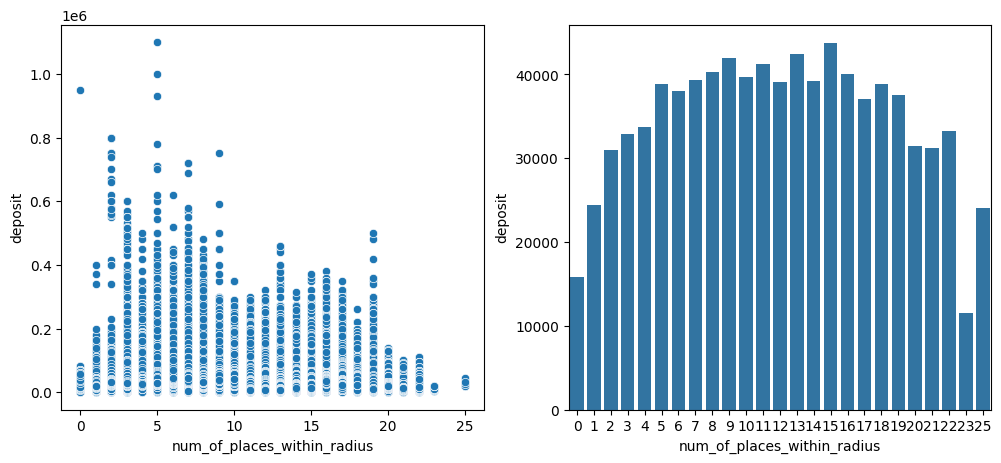

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(data=df_school, x="num_of_places_within_radius", y="deposit", ax=axes[0])
sns.barplot(df_school.groupby(["num_of_places_within_radius"])["deposit"].mean(), ax=axes[1])
plt.show()

In [19]:
df_unique_school["num_of_places_within_radius"].value_counts().sort_index()

num_of_places_within_radius
0      11230
1      42288
2      62736
3     112473
4     144744
5     159682
6     171095
7     186710
8     180066
9     167059
10    153016
11    125659
12     90318
13     60252
14     49193
15     21496
16     22845
17     15349
18      5157
19      9633
20      6403
21      2752
22      1042
23        15
25        15
Name: count, dtype: int64

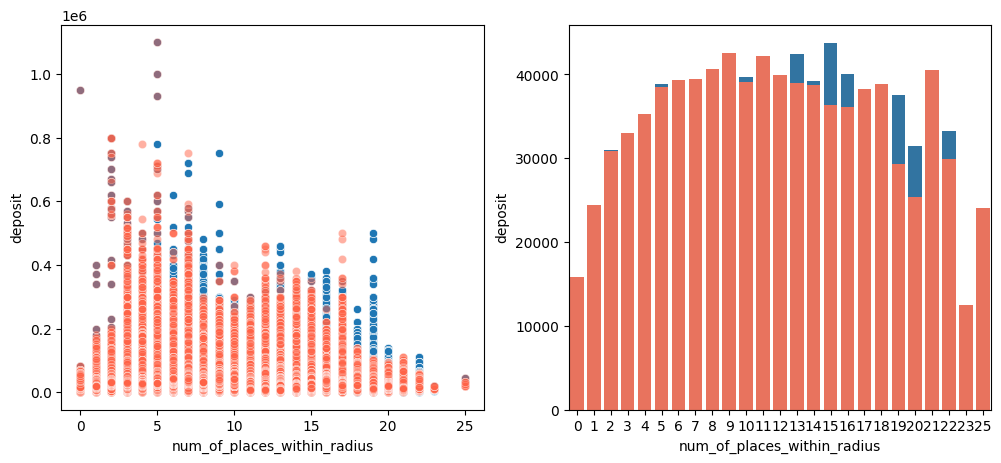

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(data=df_school, x="num_of_places_within_radius", y="deposit", ax=axes[0])
sns.barplot(df_school.groupby(["num_of_places_within_radius"])["deposit"].mean(), ax=axes[1])
sns.scatterplot(data=df_unique_school, x="num_of_places_within_radius", y="deposit", ax=axes[0], 
                markers='x', color='tomato', alpha=0.5)
sns.barplot(df_unique_school.groupby(["num_of_places_within_radius"])["deposit"].mean(), ax=axes[1],
            color='tomato')
plt.show()